QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers italicized text.

In [2]:
#loading the dataset(online)

medical_data = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
# retrieved it using urlretrieve passing the source and storing it in a new csv file
urlretrieve(medical_data , 'medical_csv')

('medical_csv', <http.client.HTTPMessage at 0x7bd156036390>)

In [5]:
#NOW WE HAVE TO convert it to a dataframe for further usage
import pandas as pd
medical_df = pd.read_csv('medical_csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we see there are some categorical features as well

In [8]:
#some statistic of the data to understand how the data is spread
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#We'll use libraries Matplotlib, Seaborn and Plotly for visualization
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#The following settings will improve the default style and font sizes for our charts.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**AGE**

In [11]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [12]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

so , we can observe it is almost an uniform distribution except for ages 18 and 19 where the count is around 70 , but the rest ages have a similiar frequency of around 30 making it uniform.
One reason for more count in 18 and 19 years could be that the insuarnce company is providing insurance to people below 20 for  vey low cost or free(just an assumption)


**BODY MASS INDEX**

In [13]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

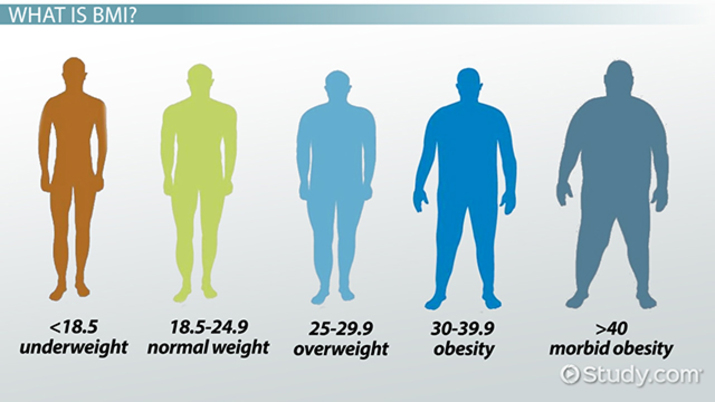

we see most of the individuals have from 26 to 34 bmi which means they are obese .
the graph is followng gausian or normal distribution where entral values have more prob
there are few underweights and overweights .
later we can see if these middle bmi weights have more charges incurred to them or not.

**charges according to smokers and non smokers**

In [14]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

its clearly visible its more cost for smokers lying btw 20k to 40k
but for non smoker prices mostly range from 3 to 11k
median prices also go form 7 to 34k.

**annual charges men vs women**


In [15]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['pink', 'cyan'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

it is visible that there is not much difference in what men and women pay as both have around same median and same iqr.

ANNUAL CHARGES ACCORDING TO DIFF REGIONS


In [16]:
medical_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'blue' , "yellow" , "red"],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

most of them pay btw 5 to 15k and there isnt much dependency on region just like sex.

In [18]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     



bmi vs charges


In [19]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

we see that there is not much relationship btw bmi and charges but for smokers we can see a trend that is smokers with bmi above 30 pay more then those below bmi 30


lets find corelation coeff to know about the relationship btw charges and other features.


In [20]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [21]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [22]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [23]:
# Calculate the correlation matrix for numeric columns only.
medical_df.select_dtypes(include=['number']).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


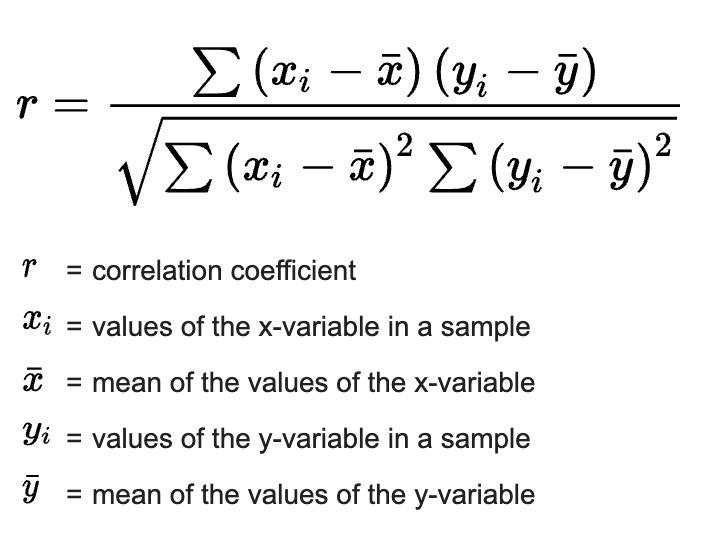

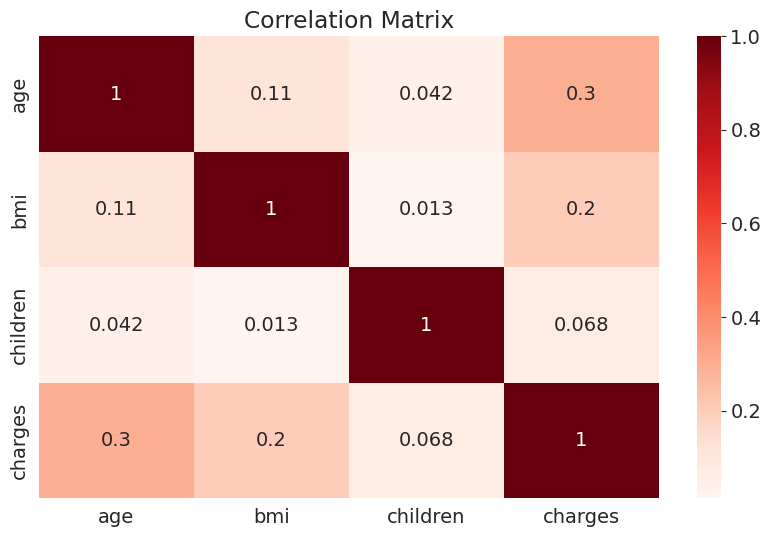

In [24]:
sns.heatmap(medical_df.select_dtypes(include=['number']).corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

lets try to plot the relationship between ages and charges and make a linear reg model with one feature

In [25]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [26]:
non_smoker_df


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

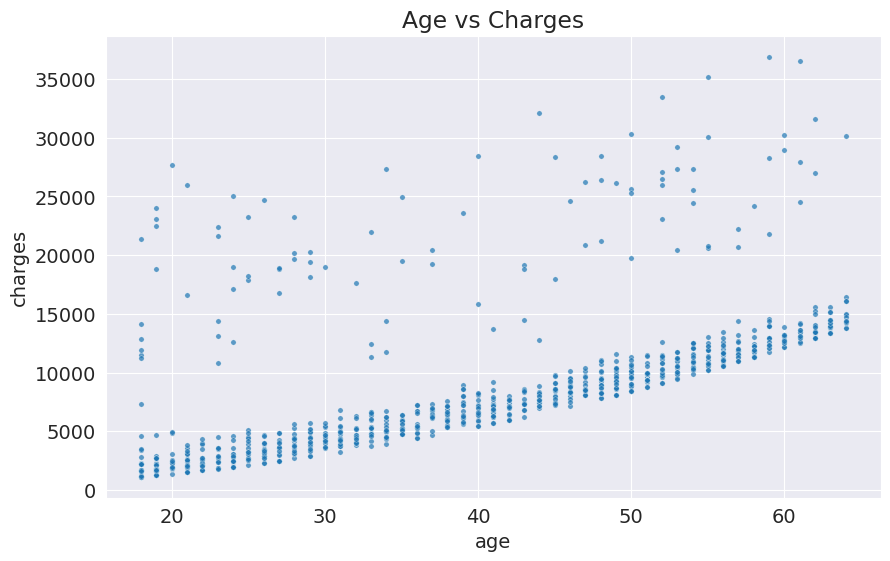

In [27]:
plt.title('Age vs Charges')
sns.scatterplot(x='age', y='charges', data=non_smoker_df, alpha=0.7, s=15)

NOW WE'LL TRY TO FIT A LINE THAT BEST PREDICTS THE RELATIONSHIP BETWEEN AGES AND CHARGES.

In [28]:
def estimate_charges(age, w, b):
    return w * age + b #CREATED A FUNCTION WHICH TAKES PARAMETER W AND B AND RETURNS Y FOR A GIVEN VALUE OF X

In [29]:
w = 50
b = 100 #ASSUME THE VALUE OF W AND B AS INITAL VALUES

In [30]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

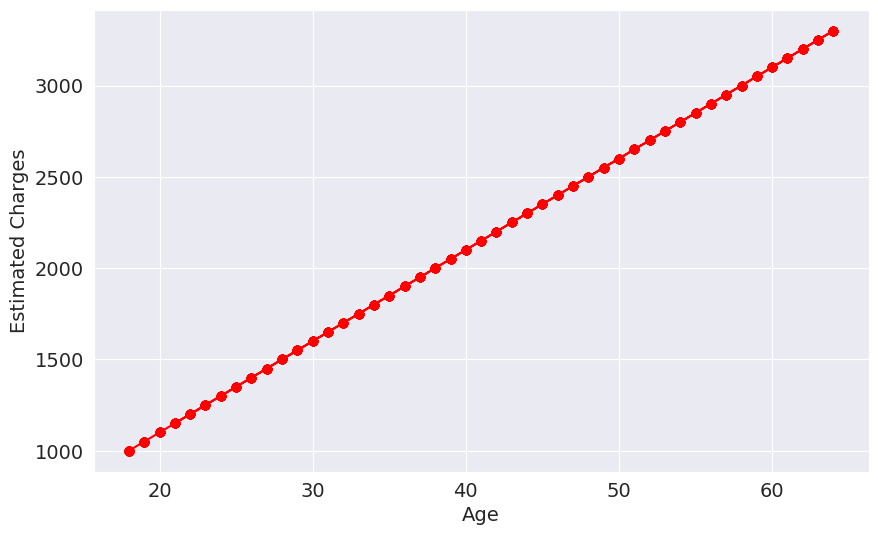

In [31]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

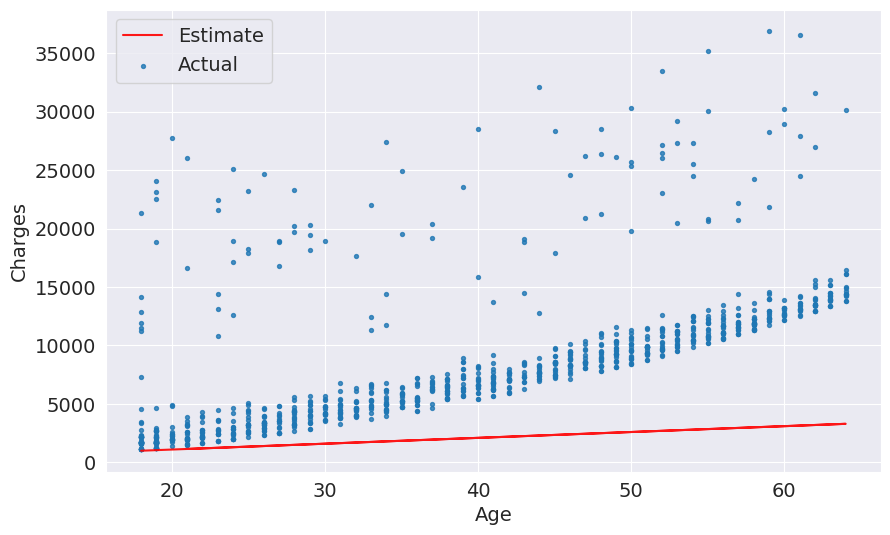

In [32]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

to see how well it fits the data
clearly it does not fit the data well as the slope seems to be really low so we can trying modyfing our parameters

In [33]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

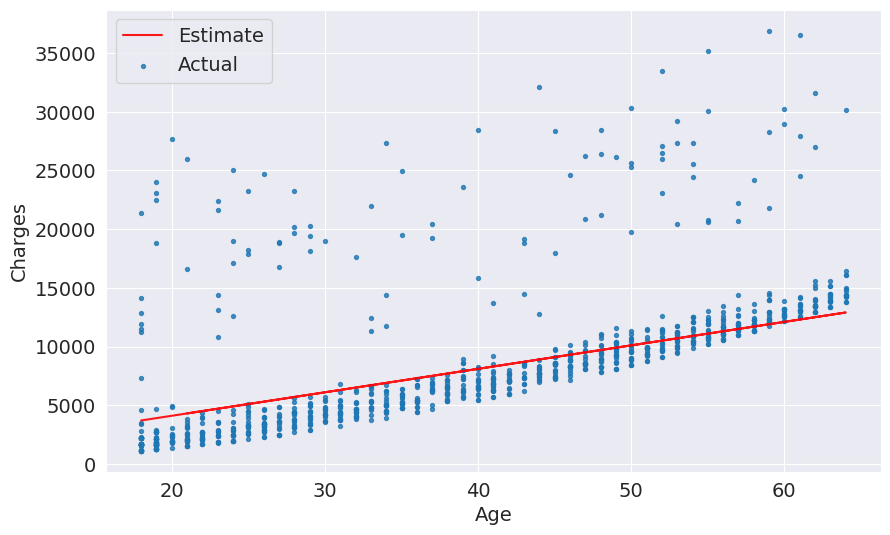

In [34]:
try_parameters(200,100)

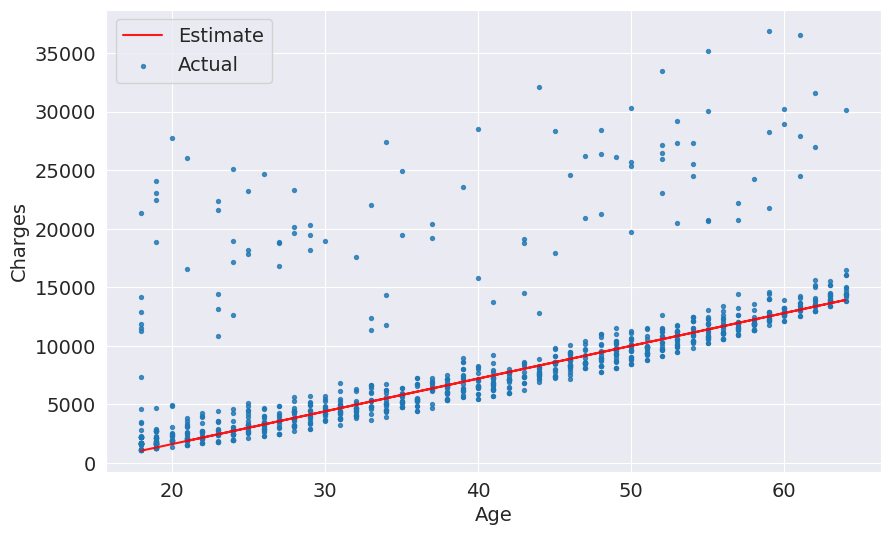

In [35]:
try_parameters(280,-4000)

observe that changing th value of b changes where you line starts and the value of w changes slope.

If we can devise a numerical method to see how well the line fits the data , then we can find the best line with the help of computer cuz till now we were manually guessing by looking at the image

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [36]:
import numpy as np

In [37]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

np.float64(5788.826330628788)

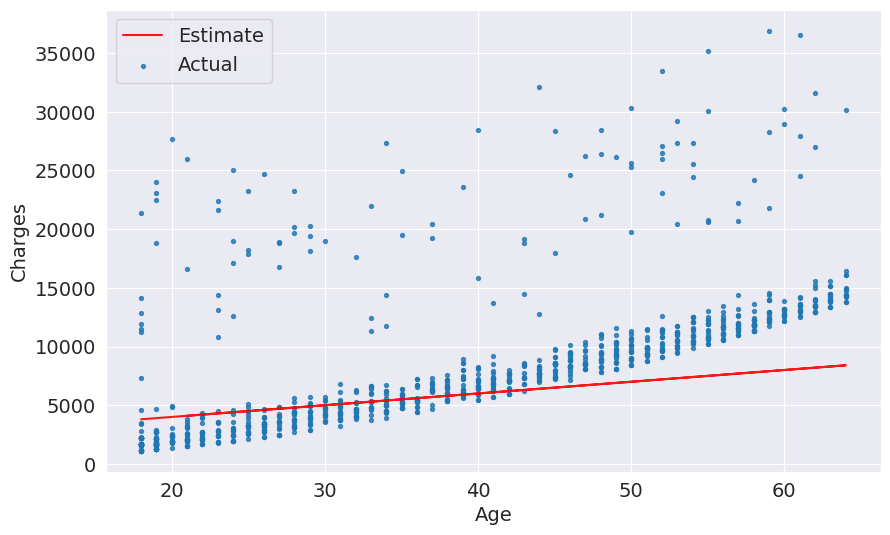

In [52]:
w = 100
b = 2000 # random inital values
try_parameters(w, b)
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

 On average, each element in the prediction differs from the actual target by $8461. We want lower loss cuz the lower the loss the better the predicted value is closer to the actual.